# Matplotlib

In this section, we will introduce Matplotlib, the most long-lived Python package for plotting data and images. It is designed to work nicely with NumPy arrays, and natively uses two and three-dimensional arrays to represent images, (gray-scale and RGB, respectively). This section will introduce basics of plotting and key features of Matplotlib. 

There are many tutorials, "cheat sheets", and other resources for using Matplotlib. Our goal here is to provide a treatment of Matplotlib with slightly deeper aims than simply showing you how to make "a plot that looks like ...". Specifically, our aim is to introduce Matplotib's [object oriented API](https://matplotlib.org/api/pyplot_summary.html#the-object-oriented-api), instead of its [function-based API](https://matplotlib.org/api/pyplot_summary.html#the-pyplot-api). Let's briefly draw a distinction between these two APIs:
```python
import matplotlib.pyplot as plt
# prepare 50 x-coordinates and 50 y-coordinates
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)

# plot using matplotlib's object-oriented API
# produces a the figure and axis objects: `fig` and `ax`
fig, ax = plt.subplots()
ax.plot(x, y)

# plot using matplotlib's functional API
plt.plot(x, y)
```

Although the code that invokes the functional API is simpler, it is far less powerful and flexible than the object-oriented API, which produces figure (`fig`) and axes (`ax`) objects that we can leverage to customize our plot. You will likely see tutorials utilize the functional API in their examples, so it is useful to understand the distinction here. Shortly, you will learn how to leverage the matplotlib's object-oriented API in powerful ways.

Consult [Matplotlib user's guide](https://matplotlib.org/users/index.html), as well as their [tutorials](https://matplotlib.org/tutorials/index.html) for additional information about this plotting library.

Matplotlib is included in the Anaconda distribution of Python packages. The `pyplot` submodule of Matplotlib  contains all of the essential plotting functionality, thus we will always need to import `pyplot`. It is standard to utilize the abbreviation "plt" when importing the `pyplot` submodule from Matplotlib:

```python
# import matplotlib's pyplot submodule
import matplotlib.pyplot as plt
```

There are many tutorials and examples available online, which demonstrate mathplotlib's wide range of capabilities for visualizing data. Here, we will only distill the essentials needed for understanding how to use Matplotlib effectively for typical data science applications.

## Plotting in Jupyter Notebooks
While Matplotlib provides a graphical interface for plots so that we can plot data from the Python shell or IPython, the Jupyter notebook is the ideal environment for creating and refining data visualizations. The command `%matplotlib notebook`, when executed in a notebook, will instruct Matplotlib to embed its plots within that notebook, rather than opening a separate window for each plot.

```python
# instructs Jupyter to embed plots within a notebook
%matplotlib notebook
```
It need only be executed once in a given notebook to instruct plots to be embedded within that notebook. This will also allow us to interact with the plots the render within the notebook, enabling panning, zooming, and saving. We will proceed with this section with the assumption that we are embedding our plots in a notebook. 

Finally, note that `%matplotlib notebook` is not a valid line of Python code, rather it is an example of a ["magic command"](http://ipython.readthedocs.io/en/stable/interactive/magics.html) which is reserved to affect the behavior of the IPython console and Jupyter notebook.

## Creating Figures and Axes with `pyplot.subplots`
There are many different wasy to create a blank figure and axes, in Matplotlib. Here, we will introduce the function `pyplot.subplots`, which creates a figure that contains axes on which data is plotted. We will see that the keyword argument `figsize` can be used to control the size of the figure, and that the keyword arguments `ncols` and `nrows` can be used to specify the grid on which the axes will be laid out within the figure.

In Matplotlib, the `Figure` object is used to contain one or more sets of `Axes` objects. Data is plotted within a given set of axes. The `subplots` function can be used to create a figure along with a specified layout of axes. By default, `subplots` will create a figure with a single set of axes; calling it will return the figure object and its axes object in a tuple:

```python
import matplotlib.pyplot as plt
%matplotlib notebook

# Creating a figure that contains a single
# set of axes. `plt.subplots()` returns
# the tuple: (Figure-instance, Axes-instance)
fig, ax = plt.subplots()
```
Executing this code will open a figure with a blank set of axes. We can use the `Axes` instance, `ax`, to plot data, add labels and a title to the plot, and add grid lines. The `Figure` instance, `fig`, controls higher-level features of the figure, such as the layout of the axes, the alignment of labels, and other factors. `fig` is perhaps most used for saving figures. Let's plot a single period of a sine wave and then save it.  

### Plotting and Saving a Figure

<IPython.core.display.Javascript object>


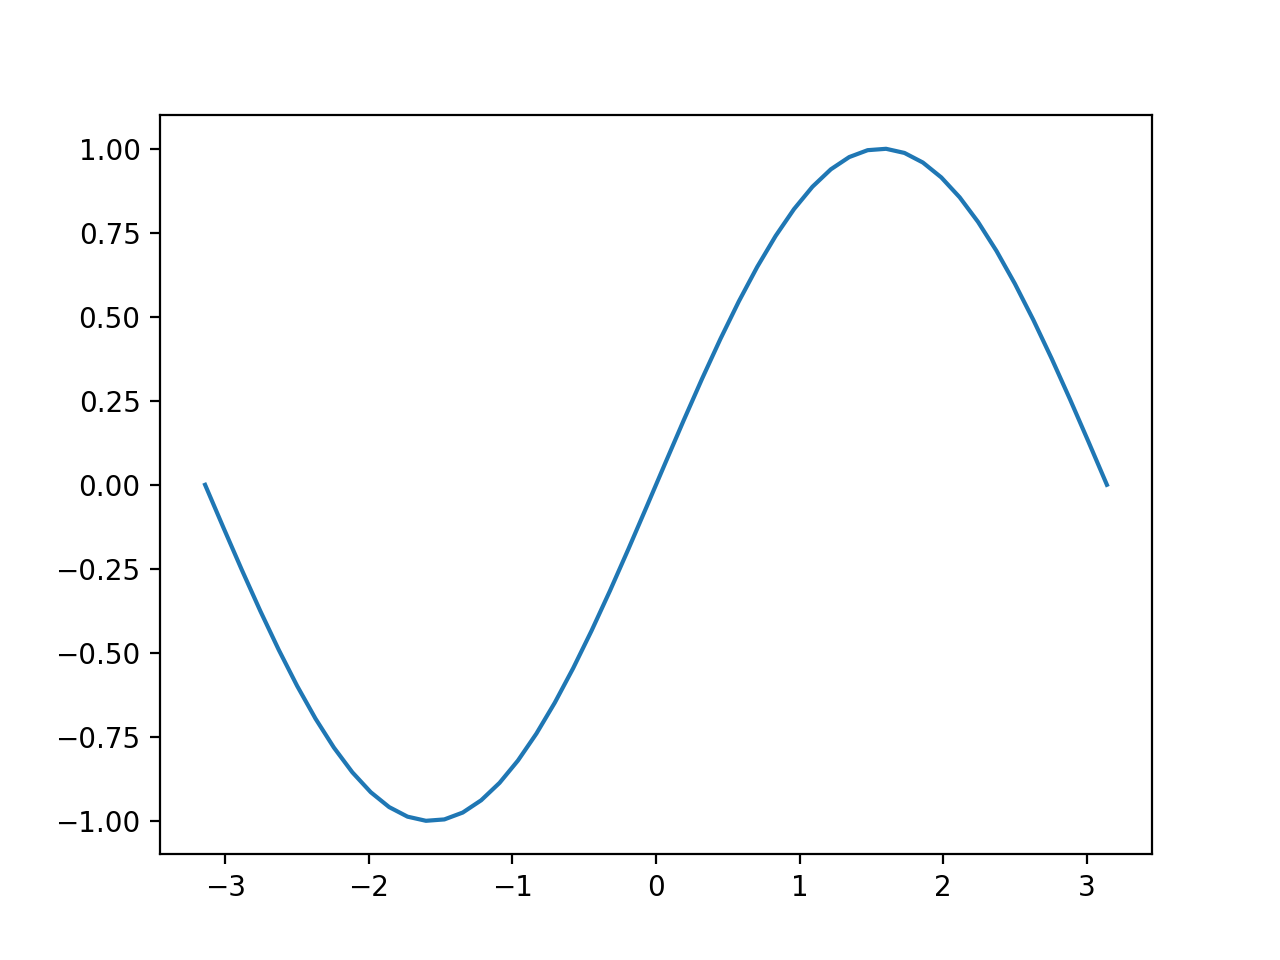

In [7]:
# using subplots to create a figure with a singe set of axes
# plotting points on a sine curve

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


# create a figure and set of axes
fig, ax = plt.subplots()

# prepare 50 x-coordinates and 50 y-coordinates
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)

# Plot data on the axes object.
# Plots corresponding x-y coordinate pairs,
# specified by the x-coordinates in `x`
# and the y-coordinates in `y`
ax.plot(x, y)

# the `fig` object is responsible for saving the 
# full figure and all of its axes. Thefollowing 
# command will save a png-image of this plot
# to the directory from where this code is executed.
fig.savefig("sinewave_plt.png");  # the semicolon merely suppresses output to the console

The `subplots` function can be fed the keyword argument `figsize` to control the size of the figure; this accepts a tuple of the width and height of the figure, in inches. The axes objects will stretch to fill the figure size.

<IPython.core.display.Javascript object>


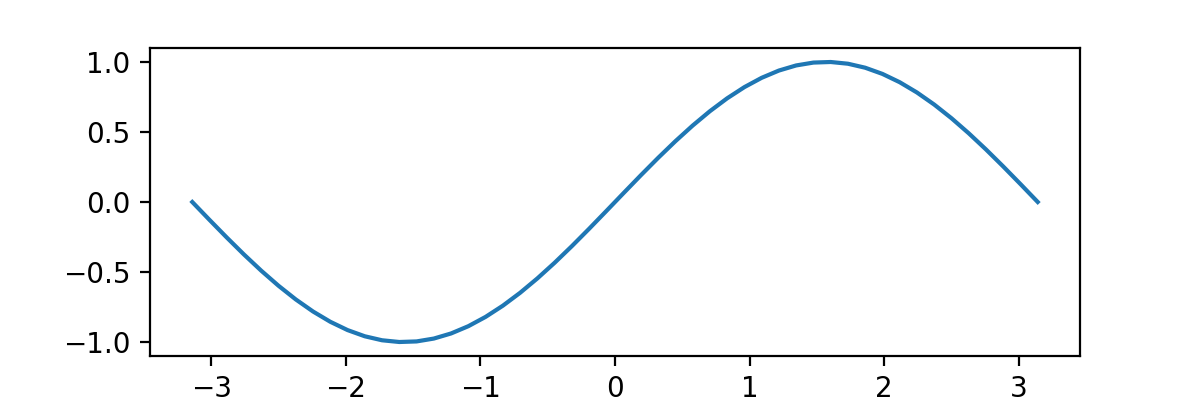

In [6]:
# specify the figure size created by `subplots`
# create a 2-inch x 3-inch figure
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x, y);

The keyword arguments `nrows` and `ncols` instructs the figure to contain `nrows x ncols` number of axes objects, laid out in a commensurate grid. In this case the second item returned in the tuple by `subplots` is not a single axes object, but instead a 2-dimensional NumPy array of shape `(nrows, ngrids)`, containing the corresponding axes arguments.

Let's create a figure with size sets of axes, laid out in a $2 x 3$ grid:

<IPython.core.display.Javascript object>


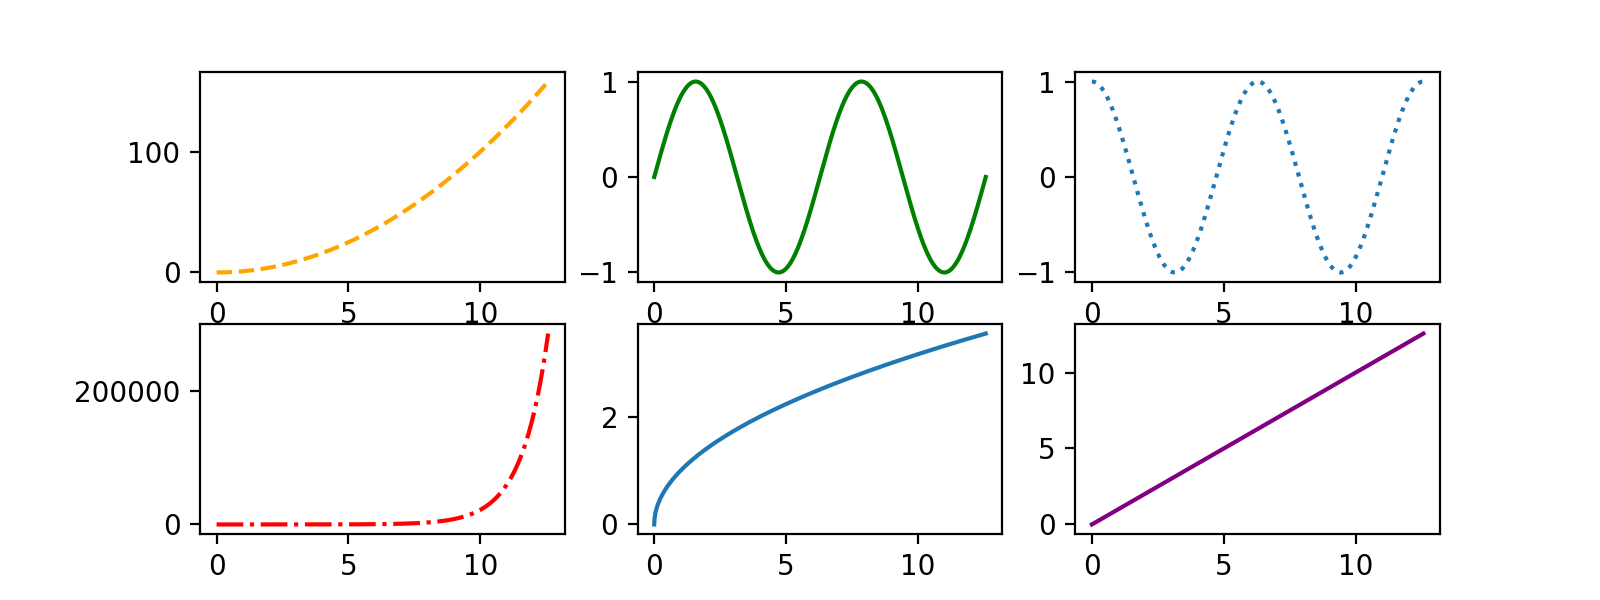

In [7]:
# create a figure with multiple axes
fig, axs = plt.subplots(2, 3, figsize=(8, 3)) # 6 axes on a 2x3 grid
# note that we could also use tuple unpacking for our axes:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(2, 3)


# the domain of x-values on which we evaluate
# our functions
x = np.linspace(0, 4*np.pi, 1000)

# row-0, col-0: plot y = x**2
axs[0, 0].plot(x, x**2, linestyle='--', color='orange')

# row-0, col-1: plot y = sin(x)
axs[0, 1].plot(x, np.sin(x), color='green')

# row-0, col-2:  plot y = cos(x)
axs[0, 2].plot(x, np.cos(x), linestyle=':')

# row-1, col-0:  plot y = exp(x)
axs[1, 0].plot(x, np.exp(x), color='red', linestyle='-.')

# row-1, col-1:  plot y = sqrt(x)
axs[1, 1].plot(x, np.sqrt(x))

# row-1, col-2:  plot y = x
axs[1, 2].plot(x, x, color='purple');

### The Axes Object

The axes object is used to control the appearance of data within a plot. A quick glance at the [official documentation for the axes object](https://matplotlib.org/api/axes_api.html) reveals that it is nearly "one object to rule them all" in Matplotlib, as it possesses a massive amount of functionality. It permits us to control the type of plotting being performed; the following is list of some of the various types of plots that can be created:

- `Axes.plot`: lines with data markers
- `Axes.scatter`: a scatter plot of x-y markers, without lines
- `Axes.hist`: a histogram
- `Axes.bar`: a bar chart
- `Axes.pie`: a pie chart
- `Axes.imshow`: draw an image within the axes
- `Axes.contour`: create a contour plot

Furthermore, the axes object controls the scales of the axes (e.g. log-scaling versus linear-scaling), it permits us to create axis labels, a title, and to affect smaller details like a plot's grid lines, tick-mark spacing, and many other items. In summary, you will be using the axes object to affect most aspects of your plot. For this reason, it is highly recommended that you familiarize yourself with the functions available to the axes object. We will only be able to demonstrate a fraction of its capabilities here; we will prioritize its most essential features, and will create diverse plots in doing so.

As seen in the previous example, `ax.plot` creates a plot with line-segments joining the the specified data points. See that, by default, it does not plot markers for each data point being plotted. We can use the `marker` and `linestyle` keyword arguments to specify the appearance of the markers for the data point, and the line segments that connect them, respectively. The available marker styles can be found [here](https://matplotlib.org/api/markers_api.html#markers), and the available line styles can be found [here](https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/line_styles_reference.html).

For a given `Axes` instance, `ax`, `ax.plot` will plot to that set of; Matplotlib will automatically cycle through colors to make distinct each set of data being plotted. We can provide a label for each data set, and use `ax.legend()` to display the labels.

<IPython.core.display.Javascript object>


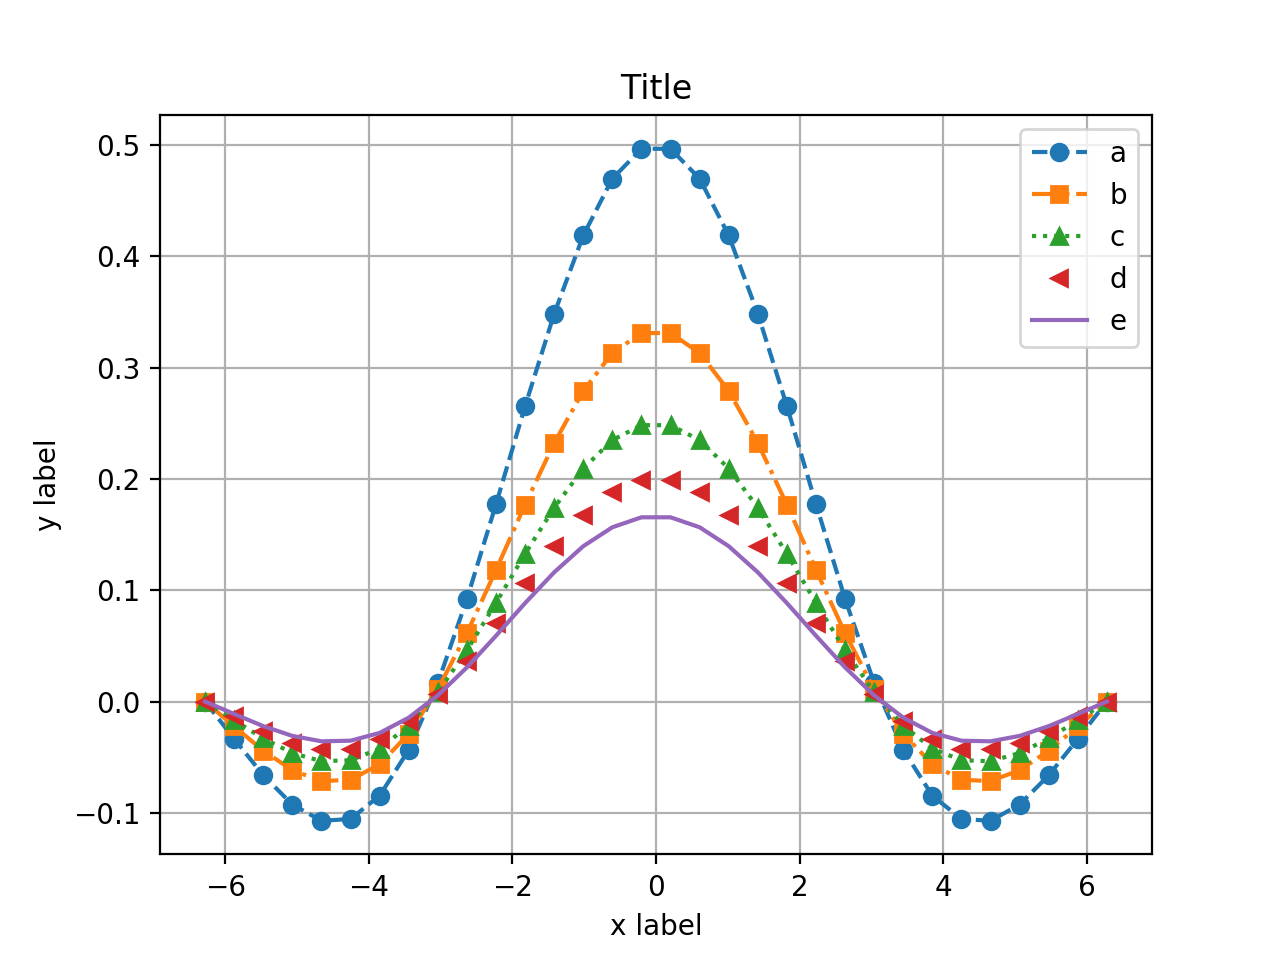

In [8]:
# demonstrating wide range of functionality controlled
# by the axes object.

# create a set of axes with multiple plots
fig, ax = plt.subplots()

x = np.linspace(-2*np.pi, 2*np.pi, 32)

# circles with a dashed line
ax.plot(x, np.sin(x)/(2*x), marker="o", linestyle="--", label='a')

# squares with a dash-dot line
ax.plot(x, np.sin(x)/(3*x), marker="s", linestyle="-.", label='b')

# upward triangles with a dotted line
ax.plot(x, np.sin(x)/(4*x), marker="^", linestyle=":", label='c')

# sideways triangles with no line
ax.plot(x, np.sin(x)/(5*x), marker="<", linestyle="", label='d')

# default: solid line with no markers
ax.plot(x, np.sin(x)/(6*x), label='e')

# add legend of labels to top-right
ax.legend(loc="upper right")

# annotate the axes with labels and a title
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Title")

# turn on x-y grid lines
ax.grid(True) 

Now, we provide a potpourri of different plots that can be created via the axes object. The resulting $2 \times 3$ grid of plots demonstrates the following:

**Plot (0, 0)**

- Using `Axes.set_yscale` to set the y-axis scale a logarithmic scale.
- Using LaTeX-formatted equations as labels.

**Plot (0, 1)**

- Using `Axes.fill_between` to shade in the bounds between the error bars for a curve. 
- The `alpha` keyword arguments allows you to set the transparency level for the shading.
- Specifying `color=C0` allows you to match the color-0 from Matplotlib's default color cycle.

**Plot (0, 2)**

- Use `Axes.errorbar` to plot a curve with discrete error bars.

**Plot (1, 0)**

- Use `Axes.scatter` to plot markers for two sets of x-y coordinates, without joining the markers with line segments.

**Plot (1, 1)**

- Use `Axes.hist` to create a histogram, with 50 bins, for Gaussian-distributed data. 

**Plot (1, 2)**

- Use `Axes.imshow` to plot a matrix (a 2D NumPy array) as an image. The matrice's entries take on random values, and the lower triangular half of the matrice's entries are set to 0.
- The magnitude of the entries are conveyed using Matplotlib's default viridis colormap.

<IPython.core.display.Javascript object>


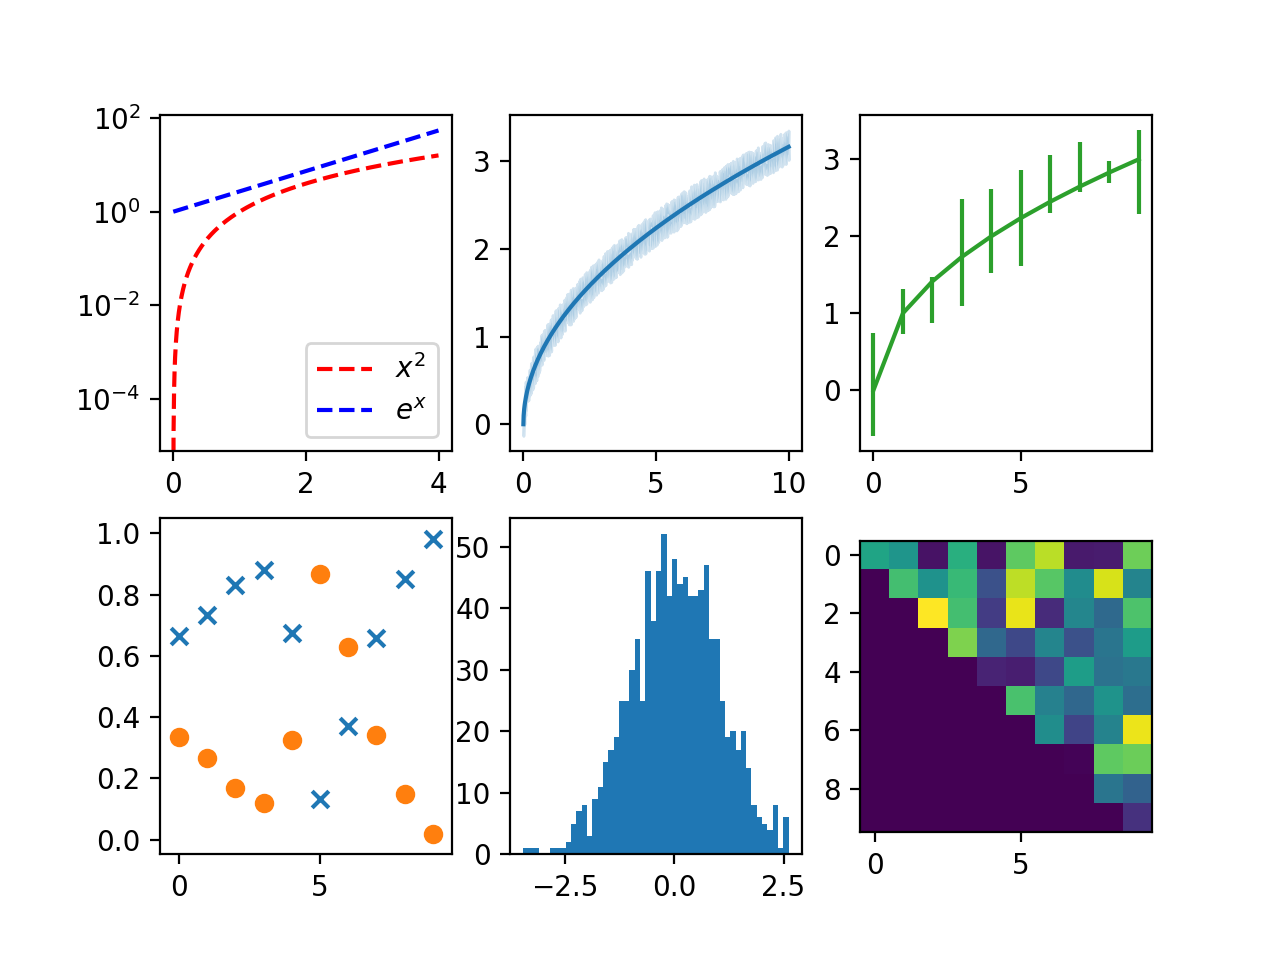

In [8]:
# demonstrating a variety of plots, in a 2x3 grid
fig, axs = plt.subplots(nrows=2, ncols=3)

################# Plot (0, 0) ##########################
# Demonstrating setting the y-axis to a log scale
x = np.linspace(0, 4, 1000)
y = x**2
axs[0, 0].plot(x, y, linestyle='--', color='red', label=r'$x^2$')
axs[0, 0].plot(x, np.exp(x), linestyle='--', color='blue', label=r'$e^x$')
axs[0, 0].set_yscale("log")
axs[0, 0].legend()


################# Plot (0, 1) ##########################
# Demonstrating `ax.fill_between`, and `alpha`
x = np.linspace(0, 10, 1000)
y = np.sqrt(x)
err_lower, err_upper = np.random.random((2, 1000))*0.2  # create the error bars
axs[0, 1].plot(x, y)

# fill between: (y - err_lower) and (y + err_upper)
# alpha indicates a meaure of opaqueness to a color: 0.2 makes the
# filled region semi-transparent
axs[0, 1].fill_between(x, y-err_lower, y+err_upper, color='C0', alpha=0.2)


################# Plot (0, 2) ##########################
# Demonstrating an errorbar plot
x = np.arange(10)
y = np.sqrt(x)

# each y has an associated lower and upper error bound,
# separated by row in a 2D array
yerr = np.random.random((2, 10)) 
axs[0, 2].errorbar(x, y, yerr, color="C2")


################# Plot (1, 0) ##########################
# Demonstrating a scatter plot
x = np.arange(10)
y = np.random.random(10)
axs[1, 0].scatter(x, y, marker='x')
axs[1, 0].scatter(x, 1-y, marker='o')


################# Plot (1, 1) ##########################
# Demonstrating a historgram
# Draw 100 numbers from Gaussian distribution,
# stored in shape-(100,) numpy array.
data = np.random.randn(1000)  
# Display the data in a 50-bin histogram.
axs[1, 1].hist(data, bins=50)


################# Plot (1, 2) ##########################
# Plotting the entries of a 2D array as an image.

# random 10x10 array with lower "half" set to 0
matrix = np.triu(np.random.rand(10, 10)) 
axs[1, 2].imshow(matrix);

    

### The Figure Object (Saving Figures)

Along with the `Axes` instances produced by `plt.subplots`, a `Figure` object is also produced. Like `Axes`, `Figure` has a massive amount of functionality associated with it, its documentation can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure). One of its essential uses is to save figures via the method `Figure.savefig`. Various file extensions can be specified with the image's filename, such as pdf, jpg, png, and eps. The image will be saved to the corresponding format. Additionally, the resolution of the saved figure can be specified in term of "dots per inch" - this is thus controlled by the input argument `dpi`.

Beyond saving plots, the `Figure` object can be used to both retrieve and set information about our figure, including the size of the figure in inches, its resolution, and its background color.

<IPython.core.display.Javascript object>


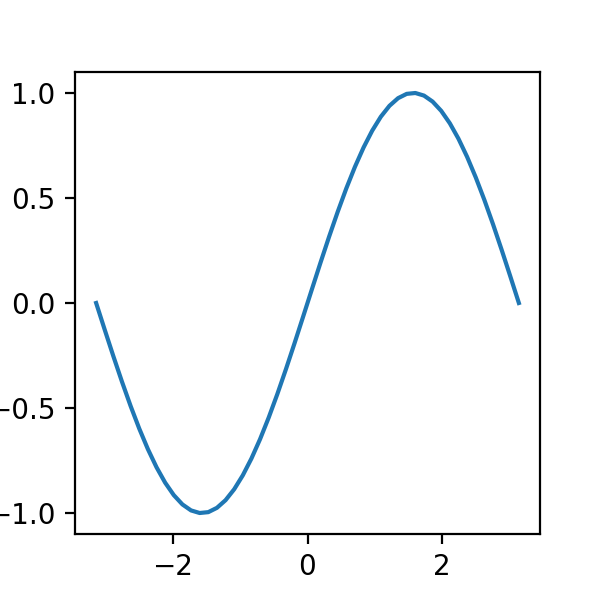

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
ax.plot(x, y)


# saving a figure as a pdf
fig.savefig("sinewave_plt.pdf")

# saving a figure as a 200 dot-per-inch png
fig.savefig("sinewave_plt.png", dpi=200);

## Displaying Images

Matplotlib also provides functionality for displaying images. Using the `Axes` object, we will use its `imshow` method to display an image. Here, 'image' can be anything that "looks like" an image. For example, a 2D numpy-array can be interpreted as a grayscale image where the rows and columns are pixel locations and the values are intensity. An image can also be $r \times c \times 3$ array, where $r$ and $c$ correspond to rows and columns of pixels, and 3 indicates 3 color channels for red, green, and blue (RGB) pixel values.

Lets plot some of these. Let's construct a 50x75x3 RGB image split into three vertical strips. The left strip will be red, the middle strip green, and the right strip blue. We will create a numpy-array of zeros, and then populate its entries with RGB color values according to this pattern.

<IPython.core.display.Javascript object>


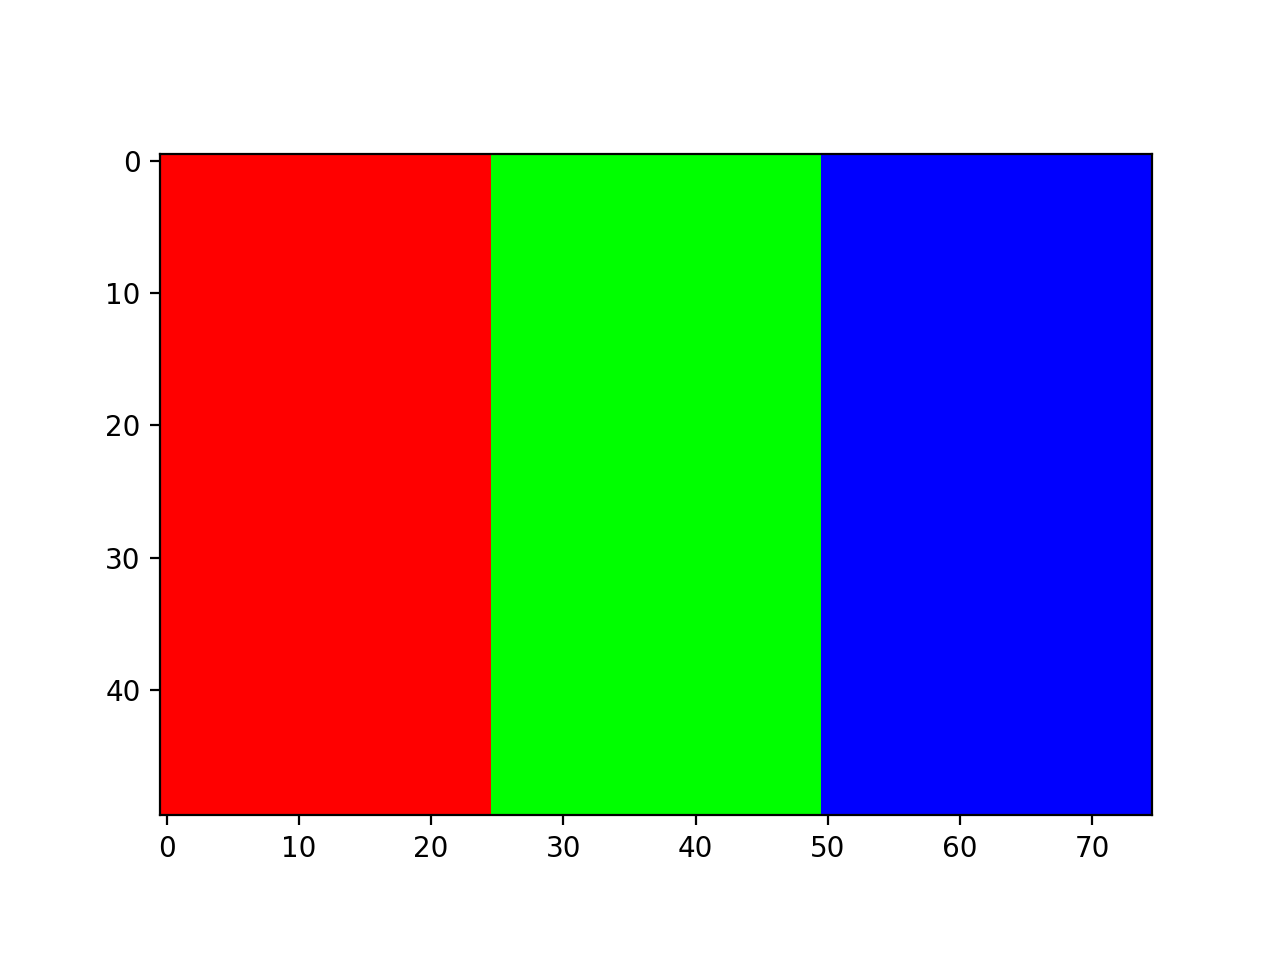

In [10]:
# generate and display an RGB image
# The image has a shape Height=50, Width=75, Color Channels=3
# Channel-0: red
# Channel-1: green
# Channel-2: blue
my_image = np.zeros((50, 75, 3)) # A shape-(50, 75, 3) array

# set the red channel values for columns 0-25
my_image[:,:25,0] = 255

# set the green channel values for columns 25-50
my_image[:,25:50,1] = 255

# set the green channel values for columns 50-75
my_image[:,50:75 ,2] = 255

my_image = my_image.astype('uint8')

fig, ax = plt.subplots()
ax.imshow(my_image);

Now, let's create a "magnitude" or "greyscale" image, which is an image with only one color channel. Let's create a 15x25 image whose values ramp up linearly from 0 to 100 along its 25 columns. This ramp will occur identically along each row of pixels. We can choose from matplotlib's [many colormaps](https://matplotlib.org/users/colormaps.html) for displaying this image. In the top plot, we will use a greyscale. In the bottom plot, we choose the perceptually-uniform "viridis" colormap.

<IPython.core.display.Javascript object>


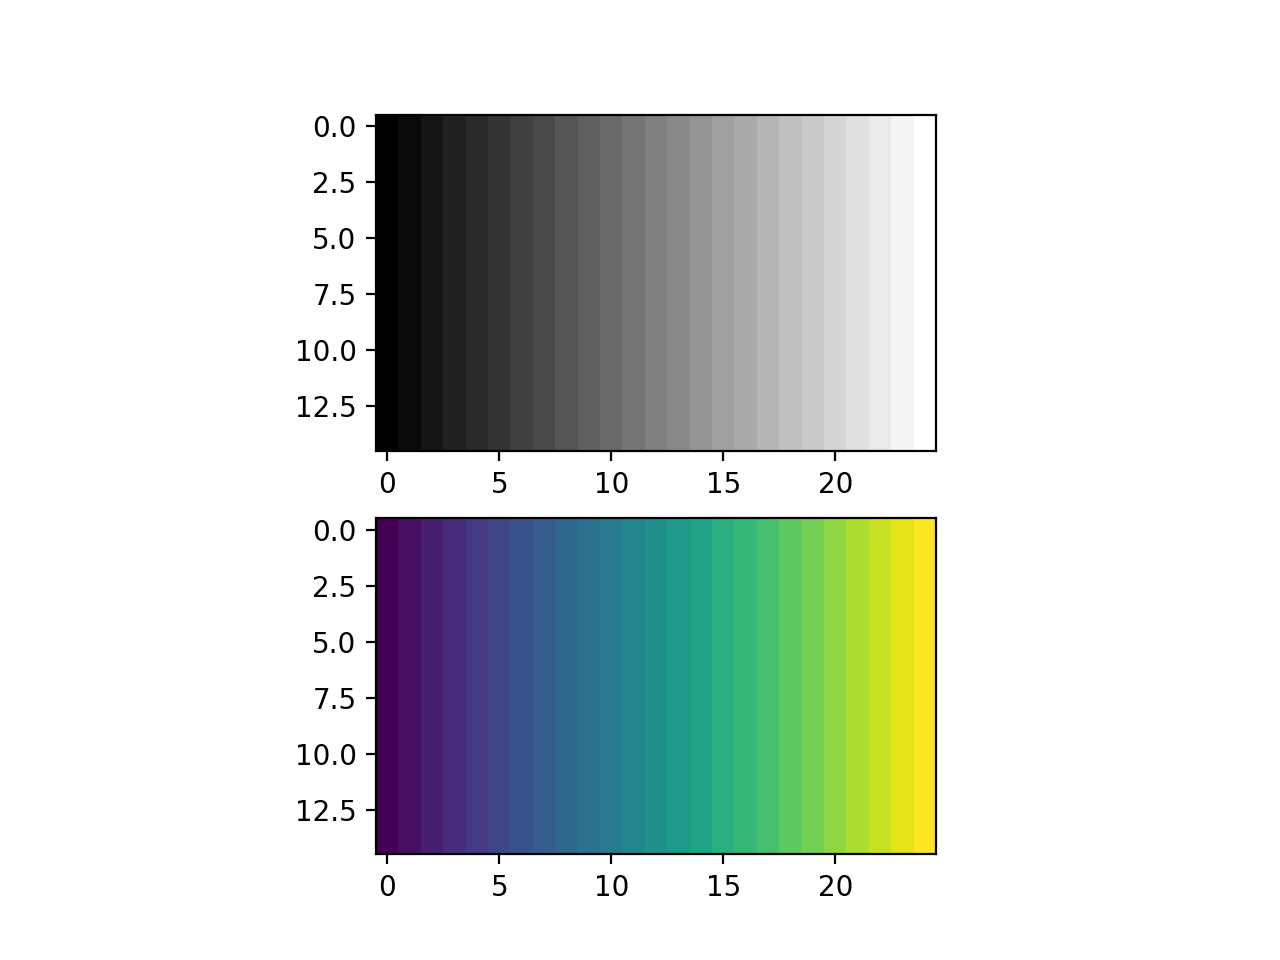

In [21]:
# generate and display a grayscale image
fig, (ax1, ax2) = plt.subplots(nrows=2)

# create a linear ramp from 0-100 along a shape-25 array,
# then broadcast this to a shape-(15, 25) array
my_image = np.broadcast_to(np.linspace(0, 100, 25), (15, 25))
ax1.imshow(my_image, cmap="gray")
ax2.imshow(my_image, cmap="viridis");

## Beyond Matplotlib

Although matplotlib is the most long-lived plotting library for Python, it is not the only player in town, nor is necessarily it the best tool for all variety of visualizations. For instance, matplotlib is not well-suited for plotting large amounts of data, nor does it facilitate dynamic, interactive plots very well. It is worthwhile to be aware of some of Python's other worthwhile plotting libraries, which benefit from a more focused design and leverage more modern plotting technologies.

[ToyPlot](https://toyplot.readthedocs.io/en/stable/) provides a sleek, minimalist interface that aims to develop beautiful interactive, animated plots that embrace the unique capabilities of electronic publishing and support reproducibility. 

[Bokeh](https://bokeh.pydata.org/en/latest/) is an interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets.

[Plotly](https://plot.ly/python/) has a Python graphing library makes interactive, publication-quality graphs online. It and Bokeh provide similar capabilities, and leverage JavaScript to create elegant interactive visualizations. Ploty and Bokeh both have their respective strengths and weaknesses.

## Links to Official Documentation

- [Matplotlib User Guide](https://matplotlib.org/users/index.html)
- [Tutorials](https://matplotlib.org/tutorials/index.html)
- [Emulating Container Types](https://docs.python.org/3/reference/datamodel.html#emulating-container-types)
- [Documentation for the Axes Object](https://matplotlib.org/api/axes_api.html)
- [Documentation for the Figure Object](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)
- [Matplotlib Colors](https://matplotlib.org/api/colors_api.html?highlight=color#module-matplotlib.colors)
- [Matplotlib Colormaps](https://matplotlib.org/users/colormaps.html)